In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isna().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [6]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Age distribution')

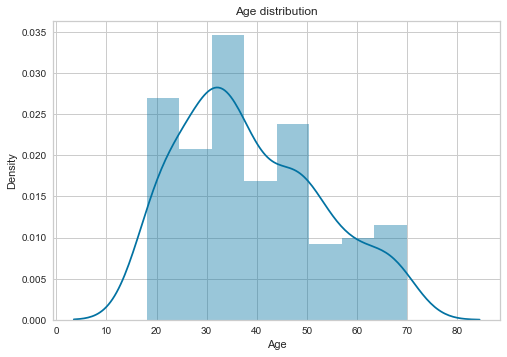

In [8]:
sns.distplot(df.Age)
plt.title("Age distribution")

Text(0.5, 1.0, 'Age distribution by gender')

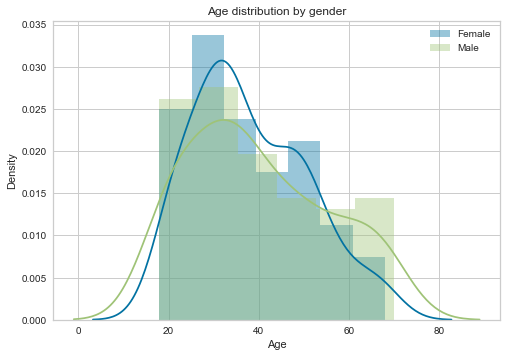

In [9]:
sns.distplot(df.loc[df.Gender == "Female"].Age, label = "Female")
sns.distplot(df.loc[df.Gender == "Male"].Age, label = "Male")
plt.legend()
plt.title("Age distribution by gender")

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Annual income distribution')

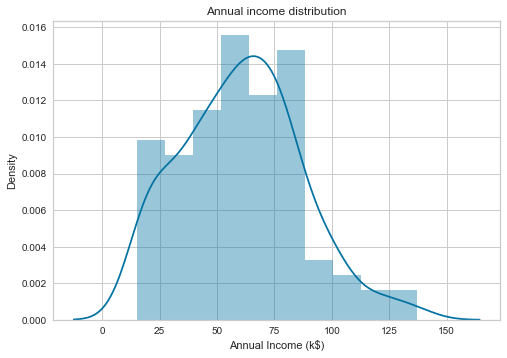

In [11]:
sns.distplot(df["Annual Income (k$)"])
plt.title("Annual income distribution")

Text(0.5, 1.0, 'Annual income  distribution by gender')

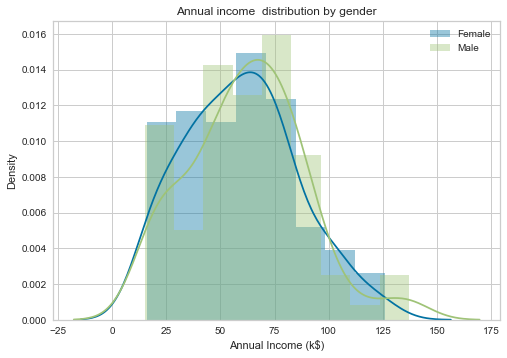

In [12]:
sns.distplot(df.loc[df.Gender == "Female"]['Annual Income (k$)'], label = "Female")
sns.distplot(df.loc[df.Gender == "Male"]['Annual Income (k$)'], label = "Male")
plt.legend()
plt.title("Annual income  distribution by gender")

Text(0.5, 1.0, 'Scatterplot Age vs Annual income')

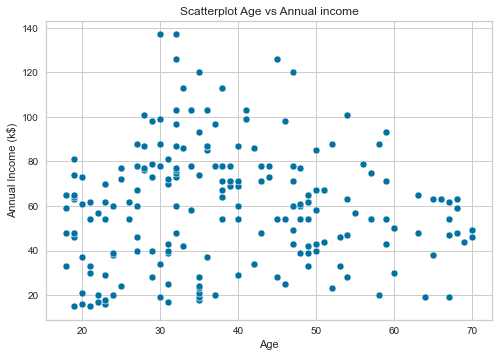

In [13]:
sns.scatterplot(x = df.Age, y = df['Annual Income (k$)'])
plt.title("Scatterplot Age vs Annual income")
#there seems to be no relationship between age and annual income

Text(0.5, 1.0, 'Spending Score distribution')

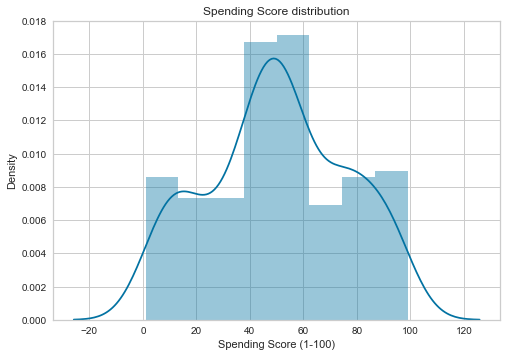

In [14]:
sns.distplot(df['Spending Score (1-100)'])
plt.title("Spending Score distribution")

Text(0.5, 1.0, 'Spending score distribution by gender')

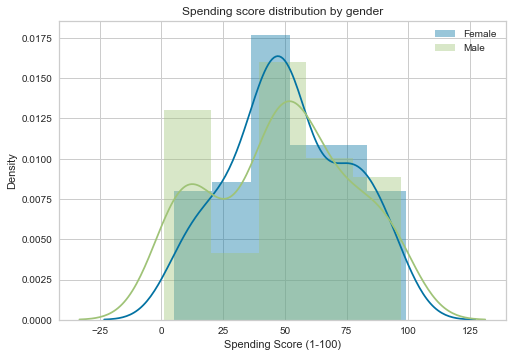

In [15]:
sns.distplot(df.loc[df.Gender == "Female"]['Spending Score (1-100)'], label = "Female")
sns.distplot(df.loc[df.Gender == "Male"]['Spending Score (1-100)'], label = "Male")
plt.legend()
plt.title("Spending score distribution by gender")

Text(0.5, 1.0, 'Scatterplot Age vs Spending score')

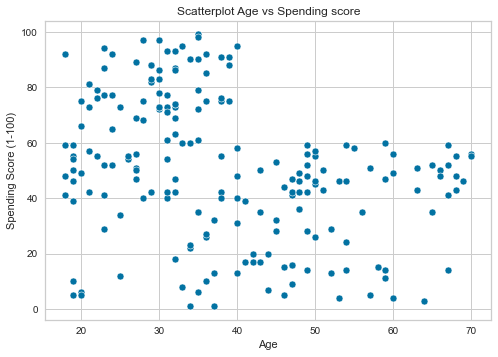

In [16]:
sns.scatterplot(x = df.Age, y = df['Spending Score (1-100)'])
plt.title("Scatterplot Age vs Spending score")
#there seems to be a negative correlation between age and the spending score

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

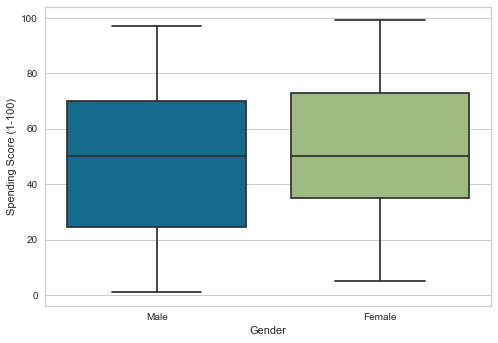

In [17]:
sns.boxplot(x = df.Gender, y = df['Spending Score (1-100)'])

In [18]:
df.corr()
#negative correlation between age and spending score is confirmed
#no correlation between age and annual income confirmed

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [19]:
df.drop(columns="CustomerID", inplace=True)

In [20]:
df.Gender = df.Gender.apply(lambda x: 1 if x == "Male" else  0)

In [21]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


I scale the features before applying k-means

In [22]:
scalar = StandardScaler()

In [23]:
df_scaled = scalar.fit_transform(df)

## K-MEANS

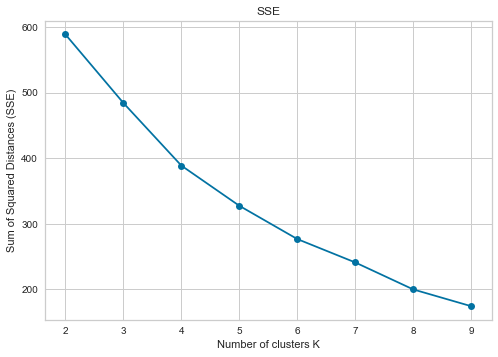

In [24]:
# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,10)
for nclust in range_n_clusters:
    km = KMeans(n_clusters=nclust, 
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
                random_state=0)
    km.fit(df_scaled)
    SSE.append(km.inertia_)
    
plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title("SSE")
plt.show()

N° of clusters = 2 -> Average silhouette coefficient:  0.2518152915788437
N° of clusters = 3 -> Average silhouette coefficient:  0.26135746780821956
N° of clusters = 4 -> Average silhouette coefficient:  0.29948092119527786
N° of clusters = 5 -> Average silhouette coefficient:  0.31437614343154285
N° of clusters = 6 -> Average silhouette coefficient:  0.3285472275203275
N° of clusters = 7 -> Average silhouette coefficient:  0.340846712169204
N° of clusters = 8 -> Average silhouette coefficient:  0.3873969164416463
N° of clusters = 9 -> Average silhouette coefficient:  0.4025192944683836


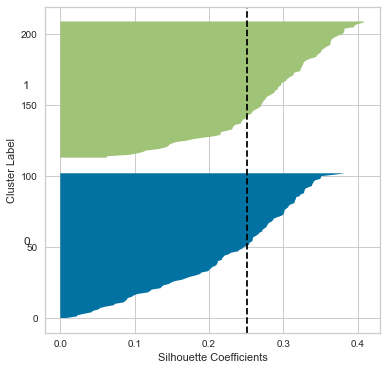

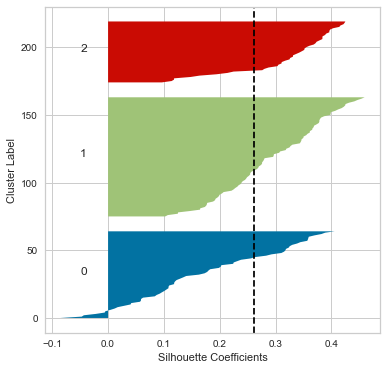

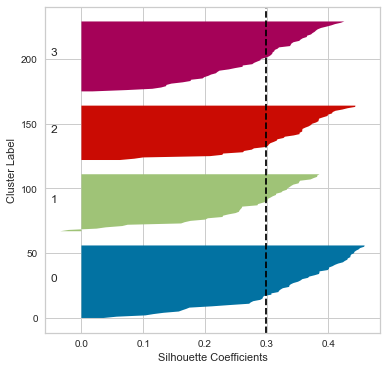

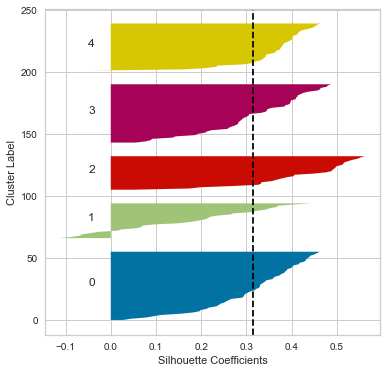

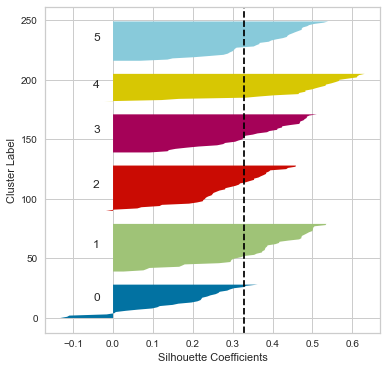

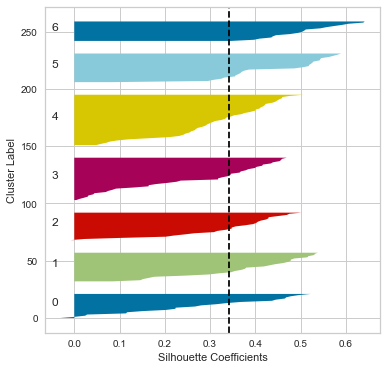

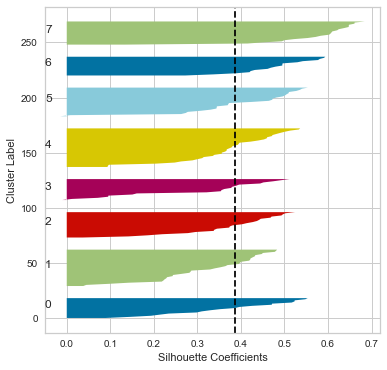

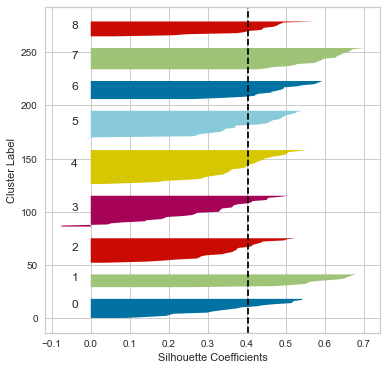

In [25]:
# Select the number of clusters by means of the silohuette coefficient
range_n_clusters = range(2,10)
for nclust in range_n_clusters:
    
    km = KMeans(n_clusters=nclust,
                init='k-means++',
                n_init=10, 
                max_iter=100,
                random_state=0)
    
    # Generate K-means clustering, compute cluster centers and predict the cluster label for each example
    cluster_labels = km.fit_predict(df_scaled)
    cluster_labels_set = np.unique(cluster_labels)
    
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(df_scaled, cluster_labels)
    print("N° of clusters =", nclust, "-> Average silhouette coefficient: ", silhouette_avg_coeff)
    
    # Compute the silhouette coefficient for each example
    silhouette_example_coeff = silhouette_samples(df_scaled, cluster_labels)
    
    # For the examples belonging to each cluster plot the silhouette coefficient
    fig = plt.figure(nclust) 
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot()
    
    y_lower = 0
    for i in cluster_labels_set:
        # Aggregate and sort the silhouette coefficients for the examples belonging to the cluster
        cluster_i_silhouette_coeff = silhouette_example_coeff[cluster_labels==i]
        cluster_i_silhouette_coeff.sort()
        y_upper = y_lower + cluster_i_silhouette_coeff.shape[0]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_coeff)
        ax1.text(-0.05, y_lower + 0.5 * cluster_i_silhouette_coeff.shape[0], str(i))
        y_lower = y_upper + 10
    
    # Enrich the silhouette plot
    ax1.axvline(x=silhouette_avg_coeff, color="black", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")

In [26]:
#alternative way to compute the avg. silhoutte coefficient and plot it

Average Silhoutte Scores:  [0.2518152915788437, 0.25951265087431563, 0.3012323168801352, 0.31709067955763137, 0.3353056505046056, 0.3558598760983251, 0.38789367668675423, 0.40225202468243715]


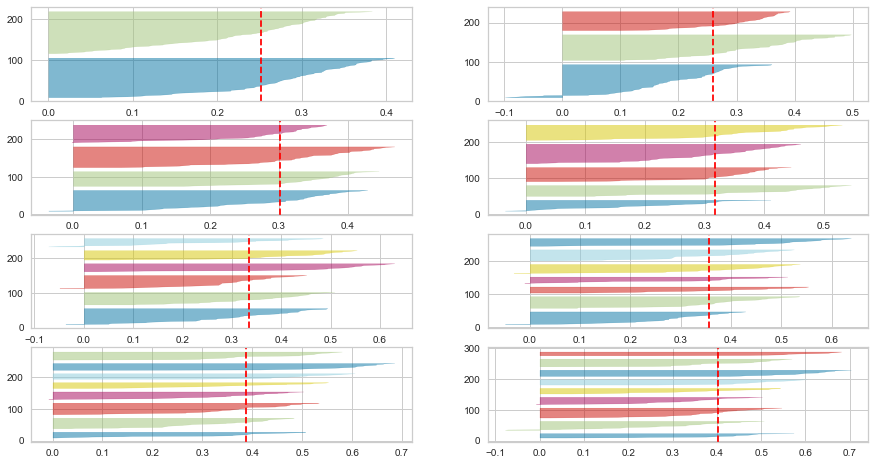

In [27]:
scores = []
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in range(2,10):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, km.labels_, metric='euclidean'))
print ("Average Silhoutte Scores: " ,scores)

In [28]:
# Generate the final K-means clustering model
#km = KMeans(n_clusters=9,
            #init='k-means++',
            #n_init=10, 
            #max_iter=100,
            #random_state=0)
#cluster_labels = km.fit_predict(df_scaled)
#df['Cluster_Label'] = cluster_labels
#df

## AGGLOMERATIVE HIERARCHICAL CLUSTERING

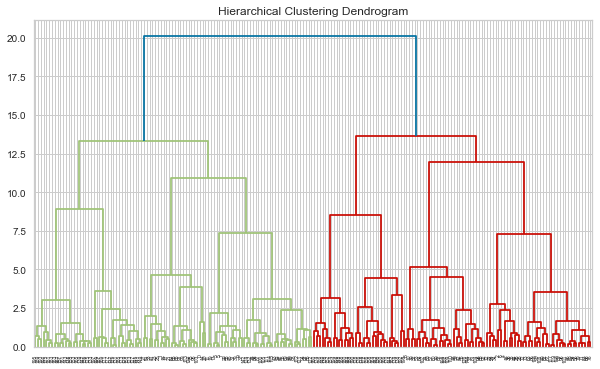

In [29]:
# Compute the linkage matrix
linkage_matrix = linkage(df_scaled, metric='euclidean', method='ward')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.show()

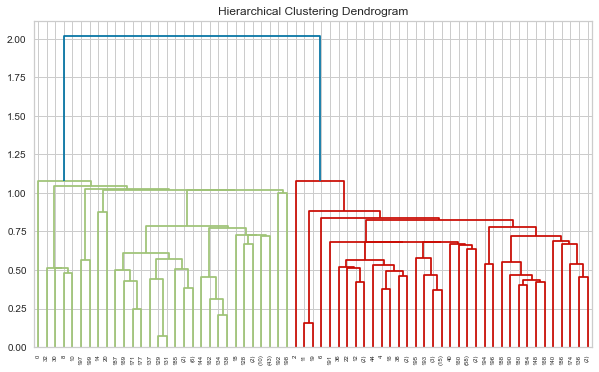

In [30]:
# Compute the linkage matrix
linkage_matrix = linkage(df_scaled, metric='euclidean', method='single')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.show()

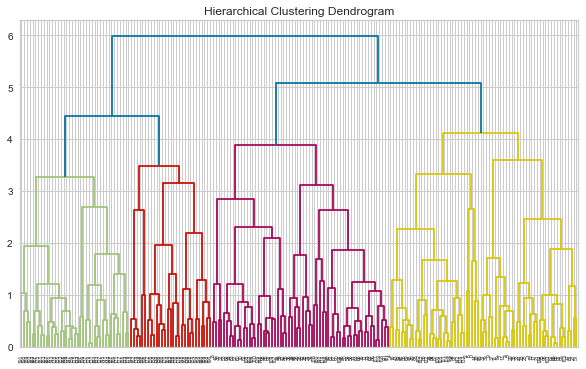

In [31]:
# Compute the linkage matrix
linkage_matrix = linkage(df_scaled, metric='euclidean', method='complete')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.show()

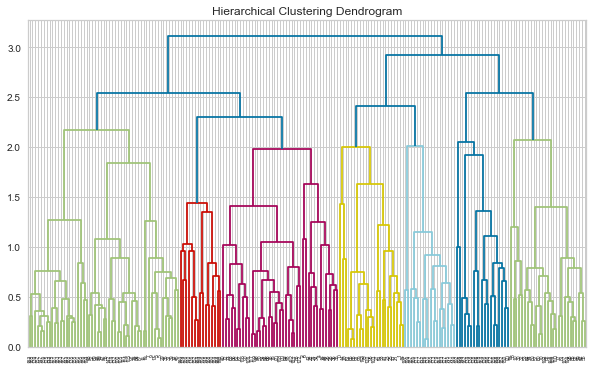

In [32]:
# Compute the linkage matrix
linkage_matrix = linkage(df_scaled, metric='euclidean', method='average')

plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.show()

In [33]:
hc = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=8)
# Generate hierarchical clustering and predict the cluster label for each example
cluster_labels = hc.fit_predict(df_scaled)
df['Cluster_Label'] = cluster_labels
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,6
196,0,45,126,28,7
197,1,32,126,74,5
198,1,32,137,18,3


In [59]:
#I create dataframes for each cluster

In [58]:
cluster_0 = df.loc[df.Cluster_Label == 0]
cluster_1 = df.loc[df.Cluster_Label == 1]
cluster_2 = df.loc[df.Cluster_Label == 2]
cluster_3 = df.loc[df.Cluster_Label == 3]
cluster_4 = df.loc[df.Cluster_Label == 4]
cluster_5 = df.loc[df.Cluster_Label == 5]
cluster_6 = df.loc[df.Cluster_Label == 6]
cluster_7 = df.loc[df.Cluster_Label == 7]

In [41]:
#cluster 0

In [57]:
cluster_0.describe()
#young females, with mid income and mid spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,38.0,38.000000,38.000000,38.000000,38.0
mean,0.0,27.105263,46.526316,58.552632,0.0
std,0.0,6.254899,18.221960,18.404901,0.0
min,0.0,18.000000,16.000000,29.000000,0.0
25%,0.0,22.250000,33.250000,42.000000,0.0
50%,0.0,26.000000,47.000000,54.000000,0.0
75%,0.0,31.000000,62.000000,73.000000,0.0
max,0.0,40.000000,76.000000,99.000000,0.0


In [61]:
cluster_1.describe()
#mid aged females with mid income and low spending scores

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,38.0,38.000000,38.000000,38.000000,38.0
mean,0.0,49.789474,44.105263,39.657895,1.0
std,0.0,10.570632,15.300220,16.218568,0.0
min,0.0,20.000000,16.000000,5.000000,1.0
25%,0.0,45.250000,33.250000,31.250000,1.0
50%,0.0,49.000000,47.000000,44.500000,1.0
75%,0.0,54.750000,56.250000,51.500000,1.0
max,0.0,68.000000,67.000000,59.000000,1.0


In [63]:
cluster_2.describe()
#young males with mid/low income and mid spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,23.0,23.000000,23.000000,23.000000,23.0
mean,1.0,24.565217,39.217391,59.652174,2.0
std,0.0,6.140966,17.619608,18.862201,0.0
min,1.0,18.000000,15.000000,13.000000,2.0
25%,1.0,19.000000,24.000000,50.500000,2.0
50%,1.0,24.000000,38.000000,59.000000,2.0
75%,1.0,28.000000,56.500000,73.000000,2.0
max,1.0,37.000000,67.000000,92.000000,2.0


In [65]:
cluster_3.describe()
#young/mid aged males with high income but very low spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,18.0,18.000000,18.000000,18.000000,18.0
mean,1.0,38.833333,86.388889,11.666667,3.0
std,0.0,13.062069,16.428594,6.489811,0.0
min,1.0,19.000000,71.000000,1.000000,3.0
25%,1.0,32.250000,77.250000,8.250000,3.0
50%,1.0,38.500000,83.000000,11.500000,3.0
75%,1.0,46.750000,87.750000,15.000000,3.0
max,1.0,59.000000,137.000000,26.000000,3.0


In [67]:
cluster_4.describe()
#mid aged/old males with mid income and low spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,29.0,29.000000,29.000000,29.000000,29.0
mean,1.0,56.551724,50.034483,41.344828,4.0
std,0.0,9.682776,14.739361,16.133983,0.0
min,1.0,38.000000,19.000000,3.000000,4.0
25%,1.0,48.000000,43.000000,36.000000,4.0
50%,1.0,57.000000,54.000000,46.000000,4.0
75%,1.0,66.000000,62.000000,51.000000,4.0
max,1.0,70.000000,77.000000,60.000000,4.0


In [69]:
cluster_5.describe()
#young males with very high income and vey high spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,18.0,18.000000,18.000000,18.000000,18.0
mean,1.0,33.277778,87.111111,82.666667,5.0
std,0.0,4.389902,18.929867,11.103788,0.0
min,1.0,27.000000,69.000000,63.000000,5.0
25%,1.0,30.000000,73.500000,74.250000,5.0
50%,1.0,32.000000,82.500000,85.500000,5.0
75%,1.0,37.500000,91.750000,91.750000,5.0
max,1.0,40.000000,137.000000,97.000000,5.0


In [71]:
cluster_6.describe()
#young females with very high income and very high spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,21.0,21.000000,21.000000,21.000000,21.0
mean,0.0,32.190476,86.047619,81.666667,6.0
std,0.0,3.076021,14.157953,7.831560,0.0
min,0.0,27.000000,70.000000,69.000000,6.0
25%,0.0,30.000000,77.000000,75.000000,6.0
50%,0.0,32.000000,79.000000,83.000000,6.0
75%,0.0,35.000000,97.000000,88.000000,6.0
max,0.0,38.000000,120.000000,95.000000,6.0


In [73]:
cluster_7.describe()
#mid aged females with high income but very low spending score

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
count,15.0,15.00000,15.000000,15.000000,15.0
mean,0.0,44.60000,92.333333,21.600000,7.0
std,0.0,7.66066,16.438920,9.701252,0.0
min,0.0,34.00000,73.000000,5.000000,7.0
25%,0.0,39.00000,78.000000,16.000000,7.0
50%,0.0,44.00000,88.000000,22.000000,7.0
75%,0.0,49.50000,102.000000,27.500000,7.0
max,0.0,57.00000,126.000000,39.000000,7.0


<AxesSubplot:xlabel='Cluster_Label', ylabel='Spending Score (1-100)'>

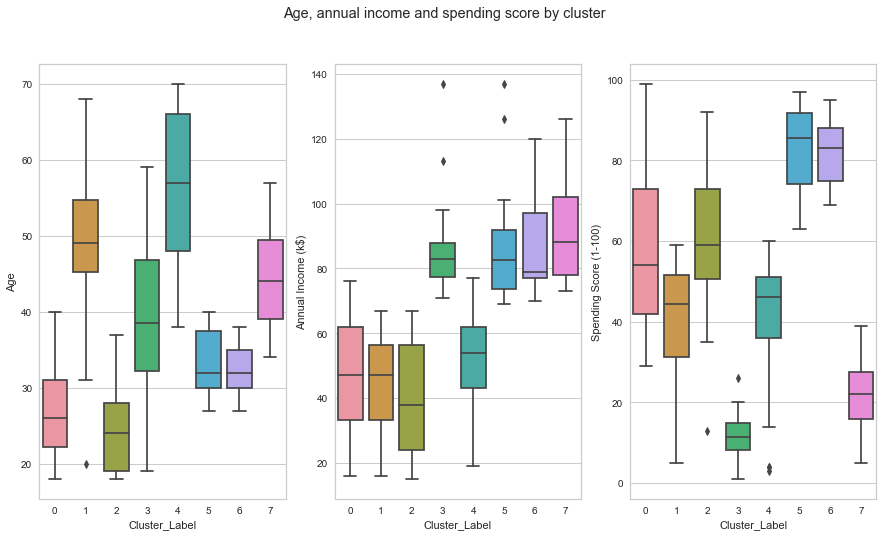

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(15,8))
fig.suptitle('Age, annual income and spending score by cluster')
sns.boxplot(ax=axes[0], y = df.Age, x = df.Cluster_Label)
sns.boxplot(ax=axes[1], y = df['Annual Income (k$)'], x = df.Cluster_Label)
sns.boxplot(ax=axes[2], y = df['Spending Score (1-100)'], x = df.Cluster_Label)

Based on my analysis the most interesting customers for the shopping mall are those belonging to clusters 5 and 6:
1. cluster 5 = young males with very high income and vey high spending score
2. cluster 6 = young females with very high income and very high spending score


Ohter two interesting cluster are 0 and 2:
1. cluster 0 = young females, with mid income and mid spending score
2. cluster 2 = young males with mid/low income and mid spending score

In [74]:
best_clusters = df.loc[(df.Cluster_Label == 5) | (df.Cluster_Label == 6)]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

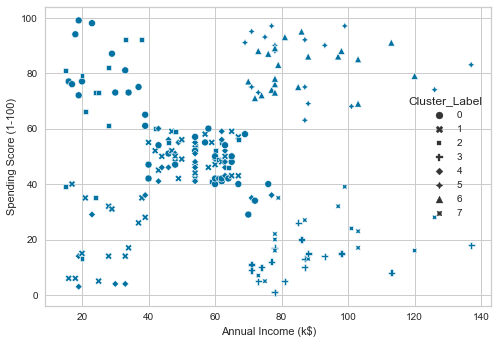

In [80]:
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], style=df.Cluster_Label)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

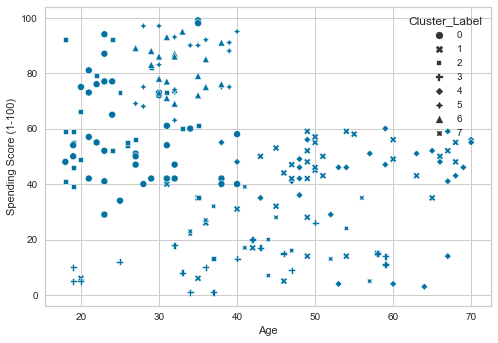

In [81]:
sns.scatterplot(x = df.Age, y = df['Spending Score (1-100)'], style = df.Cluster_Label)

From the graph above it is visible that people with higher spending scores are younger people while older people tend to have lower spending scores

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

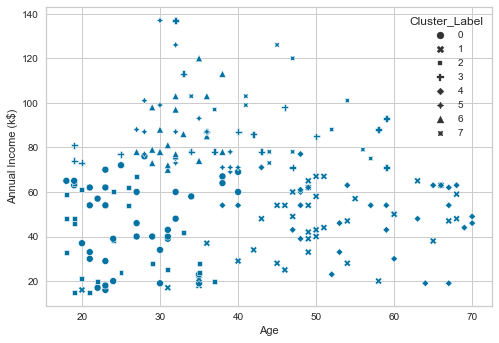

In [83]:
sns.scatterplot(x = df.Age, y = df['Annual Income (k$)'], style = df.Cluster_Label)

In [1]:
#it seems like income increases as people gets older but after a certain point it decreases as people are older (probably retired)